# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [10]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [13]:
absences = pd.read_csv("../data/absences.csv")
absences = absences.drop(columns="Unnamed: 0")

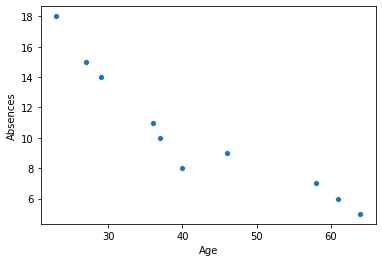

In [14]:
# your code here
sns.scatterplot(data=absences, x="Age", y="Absences")

In [15]:
# your comments here
#Yes there is an inverse correlation between the age and absences

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [26]:
# your code here
def get_reg_line(x,y):
    x_vals = np.array(x)
    y_vals = np.array(y)

    num = (x_vals-x_vals.mean()) * (y_vals - y_vals.mean())
    denom = (x_vals - x_vals.mean()) ** 2

    slope = num.sum()/ denom.sum()

    y_int = y_vals.mean() - slope*x_vals.mean()
    
    return slope, y_int

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [27]:
# your code here
get_reg_line(absences["Age"], absences["Absences"])

(-0.2681088337033404, 21.58738189891063)

In [ ]:
# your comments here
# The age and the absences are negatively correlated

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [30]:
# your code here
def cov_corr(x,y):
    correl = x.corr(y)
    cov = x.cov(y)
    return cov, correl

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [31]:
# your code here
cov_corr(absences["Age"], absences["Absences"])

(-57.69999999999999, -0.932543409248101)

In [ ]:
# your comments here
# There is a negative covariance and correlation between age and absences. 

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [32]:
# your comments here
# Based on the observations it is clear that the age and the rate of absenteeism are highly correlated
# However whether age is an indicator of absenteeism would require additional parameters to draw any further conclusion

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [33]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [34]:
# your code here
print("The correlation is", ironbeers_df["X"].corr(ironbeers_df["Y"]))
print("The covariance is", ironbeers_df["X"].cov(ironbeers_df["Y"]))

The correlation is 0.9770084209183943
The covariance is 12.0


In [ ]:
# your comments here
# There is a positive correlation, suggesting that the more people I invite the more likely to attend

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

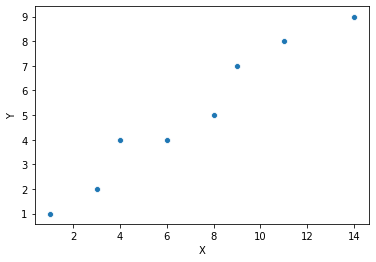

In [35]:
# your code here
sns.scatterplot(data=ironbeers_df, x="X", y="Y")

In [36]:
# your comments here
#There is a positive correlation

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [43]:
#Calling my functions
slope, y_int = get_reg_line(ironbeers_df["X"], ironbeers_df["Y"])
print(slope)
print(y_int)

0.6363636363636364
0.5454545454545459


In [37]:
# your code here
import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(ironbeers_df["X"], ironbeers_df["Y"])

In [39]:
print(slope)
print(intercept)
print(r_value)

0.6363636363636364
0.5454545454545459
0.9770084209183943


In [ ]:
# your comments here
# The R value is very high with a positive slope.

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [40]:
# your comments here
#It is very likely I am the reason that people are not staying on Fridays

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [44]:
# your code here
expected_Y = y_int + slope * np.array(ironbeers_df["X"])

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

[0.03305785 0.20661157 0.82644628 0.1322314  0.40495868 0.52892562
 0.20661157 0.20661157]


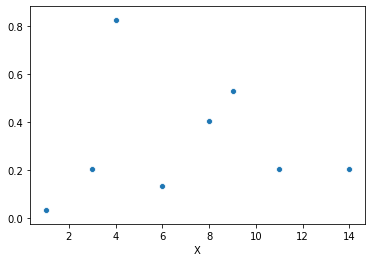

In [52]:
# your code here
error = (np.array(ironbeers_df["Y"]) - expected_Y) ** 2
print(error)
sns.scatterplot(ironbeers_df["X"], error)

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here
#Yes the points with x = 4, 8 and 9 have a high level of error.

#### 4.- Remove the points with a high error and recalculate the regression line.

In [60]:
ironbeers_df

,X,Y
0,1,1
1,3,2
3,6,4
4,8,5
5,9,7
6,11,8
7,14,9


In [63]:
ironbeers_df.drop(5, inplace=True)

In [64]:
# your code here

slope, y_int = get_reg_line(ironbeers_df["X"], ironbeers_df["Y"])
print(slope)
print(y_int)

0.652542372881356
0.23220338983050848


#### 5.- Calculate the correlation. What is happening? Comment the result.

In [65]:
# your code here
cov_corr(ironbeers_df["X"], ironbeers_df["Y"])

(19.25, 0.9945299478460592)

In [66]:
# your comments here
# the correlation keeps increasing as we drop the points with high errors